**Segmentation on EV**


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

Importing the dataset

In [ ]:
df=pd.read_csv("Indian automoble buying behavour.csv")
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded.corr()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Business,Profession_Salaried,Marrital Status_Married,Marrital Status_Single,...,Wife Working_m,Make_Baleno,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661,0.003537,-0.003537,0.551688,-0.551688,...,-0.021345,-0.226799,0.095832,-0.124768,0.156810,0.189012,0.200720,0.086884,-0.076378,-0.168120
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822,0.057834,-0.057834,0.609181,-0.609181,...,0.138249,0.010531,-0.027532,-0.096338,0.031739,0.140218,0.088433,-0.066697,0.049145,-0.027532
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630,-0.194599,0.194599,0.312964,-0.312964,...,-0.050697,-0.344089,-0.043240,-0.113214,0.298052,0.014432,0.206458,0.302687,-0.049404,-0.191010
Wife Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858,-0.129851,0.129851,0.374849,-0.374849,...,-0.089606,-0.372685,-0.190722,-0.063628,0.294476,0.016982,0.325537,0.372470,-0.037247,-0.195860
Total Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442,-0.199570,0.199570,0.416615,-0.416615,...,-0.084130,-0.435321,-0.137612,-0.109240,0.360746,0.019036,0.319924,0.408656,-0.053133,-0.235303
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000,-0.125732,0.125732,0.149477,-0.149477,...,-0.114599,-0.546985,-0.087308,0.004587,0.285135,0.076165,0.595483,0.448415,-0.137372,-0.336050
Profession_Business,0.003537,0.057834,-0.194599,-0.129851,-0.199570,-0.125732,1.000000,-1.000000,-0.041071,0.041071,...,-0.074702,0.068827,-0.015694,-0.037537,-0.118212,0.125722,-0.106187,-0.038478,0.062865,0.049044
Profession_Salaried,-0.003537,-0.057834,0.194599,0.129851,0.199570,0.125732,-1.000000,1.000000,0.041071,-0.041071,...,0.074702,-0.068827,0.015694,0.037537,0.118212,-0.125722,0.106187,0.038478,-0.062865,-0.049044
Marrital Status_Married,0.551688,0.609181,0.312964,0.374849,0.416615,0.149477,-0.041071,0.041071,1.000000,-1.000000,...,0.042687,-0.151744,0.070624,-0.045327,0.090649,0.116563,0.060679,-0.008671,0.086711,-0.102012
Marrital Status_Single,-0.551688,-0.609181,-0.312964,-0.374849,-0.416615,-0.149477,0.041071,-0.041071,-1.000000,1.000000,...,-0.042687,0.151744,-0.070624,0.045327,-0.090649,-0.116563,-0.060679,0.008671,-0.086711,0.102012


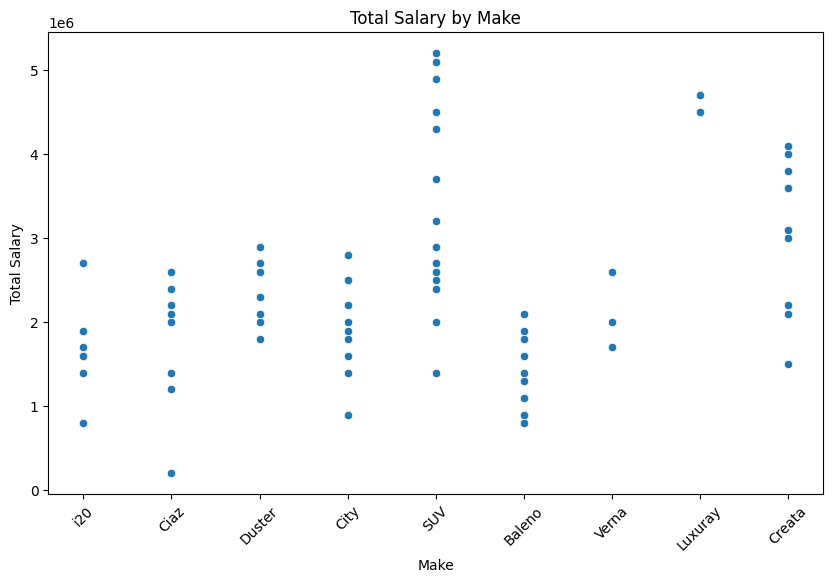

In [ ]:
# prompt: matplotlib graph between "make" and "total salary"  using the given dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Make'], y=df['Total Salary'], data=df)
plt.title('Total Salary by Make')
plt.xlabel('Make')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Make', ylabel='Price'>

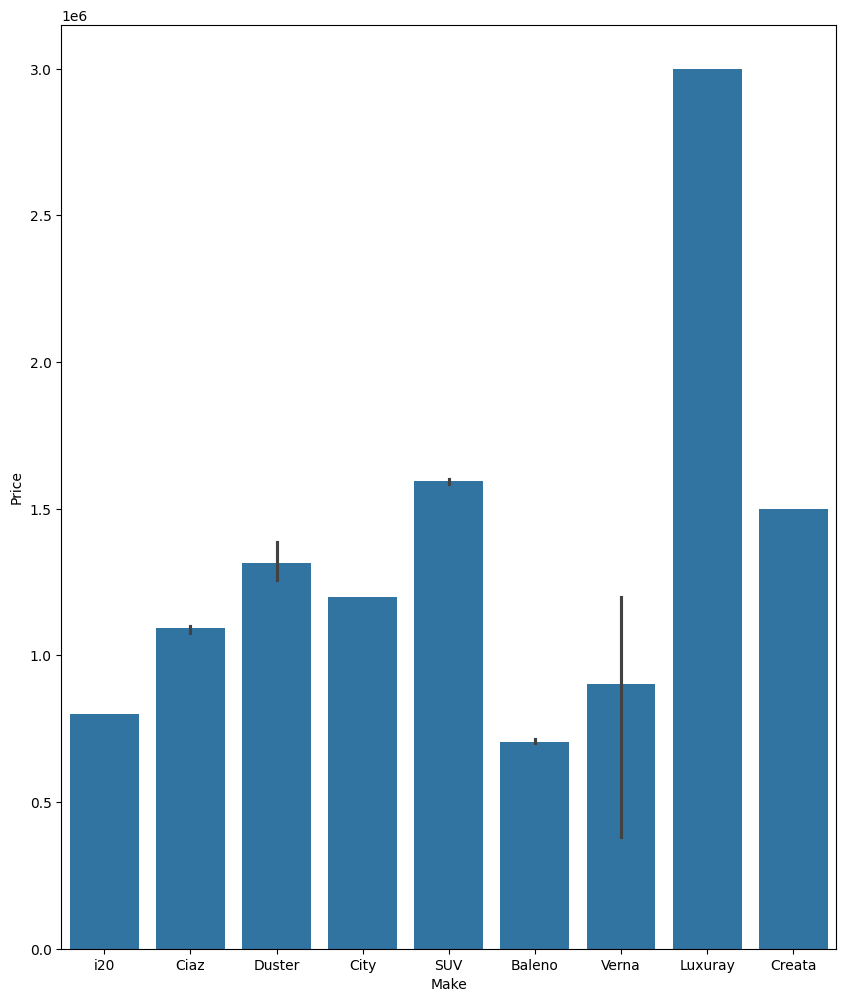

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['Make'],y=df['Price'])

<ipython-input-24-f16c48f98aba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Make', kind='count', palette='viridis', height=6, aspect=2)


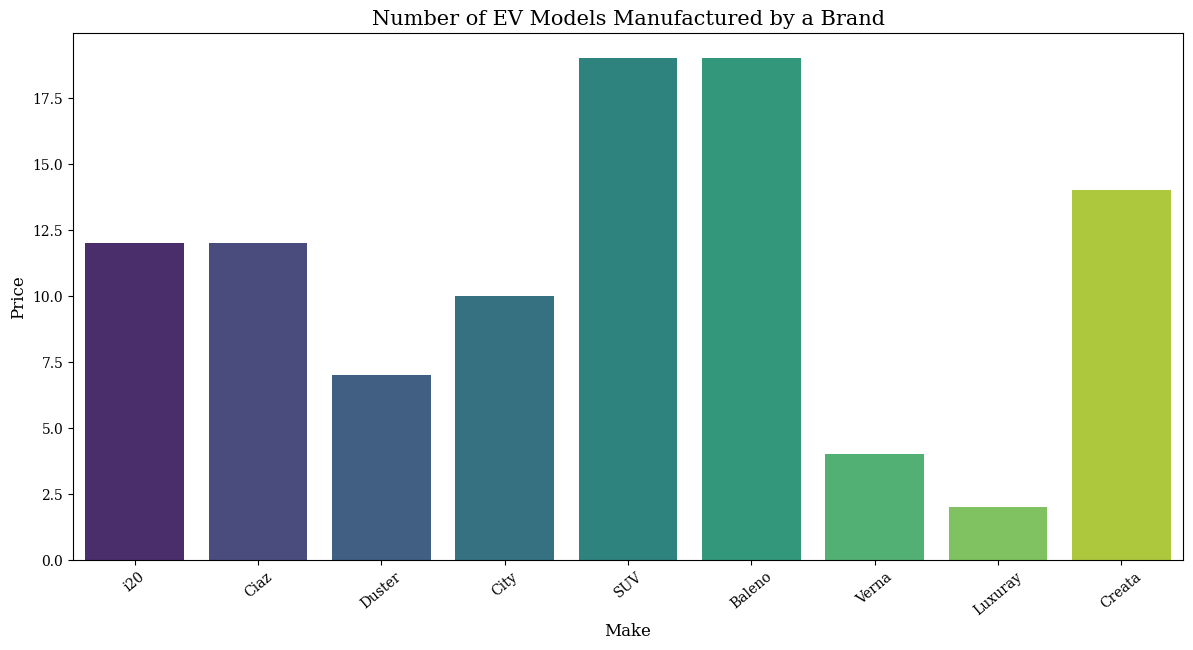

In [ ]:
sns.catplot(data=df, x='Make', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Make',family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

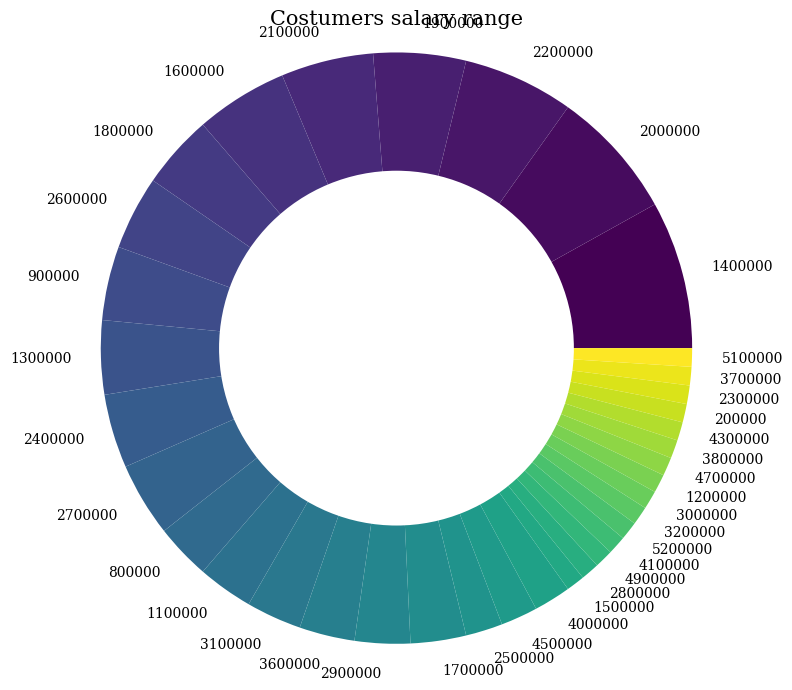

In [ ]:
x = df['Total Salary'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Costumers salary range', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Keep numerical features as they are
)

# Apply the preprocessing to your training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Now fit the model with the encoded data
reg = LinearRegression()
reg.fit(X_train_encoded, y_train)

# Continue with your predictions and scoring
trainpred = reg.predict(X_train_encoded)
testpred = reg.predict(X_test_encoded)
trainscore = reg.score(X_train_encoded, y_train)
testscore = reg.score(X_test_encoded, y_test)

In [ ]:
print("Train score :", trainscore)
print("Test score : ", testscore)

Train score : 0.9590453032058717
Test score :  0.8954346596898092


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}

# Use the preprocessed data
for name,md in models.items():
    md.fit(X_train_encoded,y_train)  # Changed to X_train_encoded
    y_pred = md.predict(X_test_encoded) # Changed to X_test_encoded
    print(f"{name}: MSE : {mean_absolute_error(y_test,y_pred)} score: {r2_score(y_test,y_pred)}")

lr: MSE : 58139.7012317508 score: 0.8954346596898092
lss: MSE : 58139.73693460219 score: 0.8954534693038976
Rid: MSE : 106707.6506138815 score: 0.8077502778624077
Dtr: MSE : 120000.0 score: 0.4964206368797828


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+09, tolerance: 1.674e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train_encoded,y_train) # Use the preprocessed data
dt.predict(X_test_encoded)

array([ 800000., 1100000., 1300000.,  800000., 1500000., 1100000.,
       1300000., 1300000., 1300000., 1500000., 1200000.,  700000.,
       1100000., 1500000., 1600000., 1600000., 1300000.,  700000.,
       1300000., 1200000.])

In [ ]:
def prediction(Age, Profession, Marital_Status, Education, No_of_Dependents, Personal_loan, House_Loan, Wife_Working, Salary, Wife_Salary, Total_Salary, Make):
    features = np.array([[Age, Profession, Marital_Status, Education, No_of_Dependents, Personal_loan, House_Loan, Wife_Working, Salary, Wife_Salary, Total_Salary, Make]])
    transformed_features = preprocessor.transform(features)
    predicted_value = dt.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]


In [ ]:
import pandas as pd # Import pandas

def prediction(Age, Profession, Marital_Status, Education, No_of_Dependents, Personal_loan, House_Loan, Wife_Working, Salary, Wife_Salary, Total_Salary, Make):
    # Create a dictionary for features
    features = {'Age': [30],  # Use lists for values
                'Profession': ['Engineer'],
                'Marital Status': ['Single'],
                'Education': ['Graduate'],
                'No of Dependents': [0],
                'Personal loan': [0],
                'House Loan': [0],
                'Wife Working': ['No'],
                'Salary': [60000],
                'Wife Salary': [0],
                'Total Salary': [60000],
                'Make': ['Honda']}

    # Convert the dictionary to a pandas DataFrame
    features_df = pd.DataFrame(features)

    transformed_features = preprocessor.transform(features_df)
    predicted_value = dt.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [ ]:
result = prediction(30, 'Engineer', 'Single', 'Graduate', 0, 0, 0, 'No', 60000, 0, 60000, 'Honda')
print(result)

KeyError: "['Marrital Status'] not in index"